Wendy Total Movie Sales – Marvel vs DC Type of Graph: Line Graph X-axis: 1 to 20 years Y-axis: Sales What do we want to find out? Over 20 years, did Marvel sell tickets than DC.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np



In [2]:
marvel_dc_movie_data = pd.read_csv("csv_omdb_merged.csv").sort_values(['Company_x','Release'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
marvel_dc_movie_data


,Unnamed: 0,Company_x,Film,Release,Adjusted,Worldwide,Domestic,Foreign,Rated,Director,Internet Movie Database,Rotten Tomatoes,Metacritic,Metascore,imdb,imdbVotes
0,0,DC,Steel,1997,2.539807,1.710972,1.710972,NaN,PG-13,Kenneth Johnson,NaN,NaN,NaN,NaN,2.8,"9,365"
1,1,DC,Batman & Robin,1997,353.600292,238.207122,107.325195,130.881927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,DC,League of Extraordinary Gentlemen,2003,232.119211,179.265204,66.465204,112.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,DC,Catwoman,2004,103.551571,82.102379,40.202379,41.900000,PG-13,Pitof,NaN,NaN,NaN,27.0,3.3,"93,823"
14,14,DC,Constantine,2005,281.660453,230.884728,75.976178,154.908550,R,Francis Lawrence,NaN,NaN,NaN,50.0,6.9,"255,131"
16,16,DC,Batman Begins,2005,456.516123,374.218673,206.852432,167.366241,PG-13,Christopher Nolan,NaN,NaN,NaN,70.0,8.3,"1,085,746"
17,17,DC,V for Vendetta,2005,161.652607,132.511035,70.511035,62.000000,R,James McTeigue,NaN,NaN,NaN,62.0,8.2,"875,211"
19,19,DC,Superman Returns,2006,462.178046,391.081192,200.081192,191.000000,PG-13,Bryan Singer,NaN,NaN,NaN,72.0,6.1,"250,161"
24,24,DC,The Dark Knight,2008,1111.624312,1004.558444,534.858444,469.700000,PG-13,Christopher Nolan,NaN,NaN,NaN,82.0,9.0,"1,848,050"
28,28,DC,The Spirit,2008,43.191298,39.031337,19.806188,19.225149,PG-13,Frank Miller,NaN,NaN,NaN,30.0,4.8,"55,704"


In [3]:
dc_movie_data=marvel_dc_movie_data.loc[marvel_dc_movie_data['Company_x'] == 'DC']
dc_movie_data.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

,Unnamed: 0,Company_x,Film,Release,Adjusted,Worldwide,Domestic,Foreign,Rated,Director,Internet Movie Database,Rotten Tomatoes,Metacritic,Metascore,imdb,imdbVotes
0,0,DC,Steel,1997,2.539807,1.710972,1.710972,NaN,PG-13,Kenneth Johnson,NaN,NaN,NaN,NaN,2.8,"9,365"
1,1,DC,Batman & Robin,1997,353.600292,238.207122,107.325195,130.881927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,DC,League of Extraordinary Gentlemen,2003,232.119211,179.265204,66.465204,112.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,DC,Catwoman,2004,103.551571,82.102379,40.202379,41.900000,PG-13,Pitof,NaN,NaN,NaN,27.0,3.3,"93,823"
4,14,DC,Constantine,2005,281.660453,230.884728,75.976178,154.908550,R,Francis Lawrence,NaN,NaN,NaN,50.0,6.9,"255,131"
5,16,DC,Batman Begins,2005,456.516123,374.218673,206.852432,167.366241,PG-13,Christopher Nolan,NaN,NaN,NaN,70.0,8.3,"1,085,746"
6,17,DC,V for Vendetta,2005,161.652607,132.511035,70.511035,62.000000,R,James McTeigue,NaN,NaN,NaN,62.0,8.2,"875,211"
7,19,DC,Superman Returns,2006,462.178046,391.081192,200.081192,191.000000,PG-13,Bryan Singer,NaN,NaN,NaN,72.0,6.1,"250,161"
8,24,DC,The Dark Knight,2008,1111.624312,1004.558444,534.858444,469.700000,PG-13,Christopher Nolan,NaN,NaN,NaN,82.0,9.0,"1,848,050"
9,28,DC,The Spirit,2008,43.191298,39.031337,19.806188,19.225149,PG-13,Frank Miller,NaN,NaN,NaN,30.0,4.8,"55,704"


In [4]:
dc_moive_by_year = dc_movie_data.groupby("Release").sum().reset_index(level =0, inplace = False)
dc_moive_by_year

,Release,Unnamed: 0,Adjusted,Worldwide,Domestic,Foreign,Internet Movie Database,Rotten Tomatoes,Metacritic,Metascore,imdb
0,1997,1,356.140099,239.918094,109.036167,130.881927,NaN,NaN,NaN,NaN,2.8
1,2003,8,232.119211,179.265204,66.465204,112.800000,NaN,NaN,NaN,NaN,NaN
2,2004,12,103.551571,82.102379,40.202379,41.900000,NaN,NaN,NaN,27.0,3.3
3,2005,47,899.829183,737.614436,353.339645,384.274791,NaN,NaN,NaN,182.0,23.4
4,2006,19,462.178046,391.081192,200.081192,191.000000,NaN,NaN,NaN,72.0,6.1
5,2008,52,1154.815610,1043.589781,554.664632,488.925149,NaN,NaN,NaN,112.0,13.8
6,2009,29,205.735853,185.258983,107.509799,77.749184,NaN,NaN,NaN,56.0,7.6
7,2010,63,44.013818,40.283035,34.138549,6.144486,NaN,NaN,NaN,77.0,11.1
8,2011,37,232.861094,219.851172,116.601172,103.250000,NaN,NaN,NaN,39.0,5.6
9,2012,41,1125.323899,1084.439099,448.139099,636.300000,NaN,NaN,NaN,78.0,8.4


In [5]:
marvel_movie_data = marvel_dc_movie_data.loc[marvel_dc_movie_data['Company_x']=='Marvel']
marvel_movie_data.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

,Unnamed: 0,Company_x,Film,Release,Adjusted,Worldwide,Domestic,Foreign,Rated,Director,Internet Movie Database,Rotten Tomatoes,Metacritic,Metascore,imdb,imdbVotes
0,2,Marvel,Blade,1998,191.745252,131.183530,70.087718,61.095812,R,Stephen Norrington,NaN,NaN,NaN,45.0,7.1,"207,875"
1,3,Marvel,X-Men,2000,410.005182,296.339527,157.299717,139.039810,PG-13,Bryan Singer,NaN,NaN,NaN,64.0,7.4,"496,782"
2,4,Marvel,Blade II,2002,205.287049,155.010032,82.348319,72.661713,R,Guillermo del Toro,NaN,NaN,NaN,52.0,6.7,"172,769"
3,5,Marvel,Spider-Man,2002,1088.227139,821.708551,403.706375,418.002176,PG-13,Sam Raimi,NaN,NaN,NaN,73.0,7.3,"589,948"
4,6,Marvel,Hulk,2003,317.701817,245.360480,132.177234,113.183246,PG-13,Ang Lee,NaN,NaN,NaN,54.0,5.7,"224,806"
5,7,Marvel,Daredevil,2003,232.008521,179.179718,102.543518,76.636200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,Marvel,X2: X-Men United,2003,527.919981,407.711549,214.949694,192.761855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,Marvel,Spider-Man 2,2004,988.524779,783.766341,373.585825,410.180516,PG-13,Sam Raimi,NaN,NaN,NaN,83.0,7.3,"455,348"
8,11,Marvel,The Punisher,2004,68.990471,54.700105,33.810189,20.889916,R,Jonathan Hensleigh,NaN,NaN,NaN,33.0,6.5,"133,725"
9,13,Marvel,Blade: Trinity,2004,162.581808,128.905366,52.411906,76.493460,R,David S. Goyer,NaN,NaN,NaN,38.0,5.9,"144,268"


In [6]:
marvel_movie_by_year = marvel_movie_data.groupby("Release").sum().reset_index(level =0, inplace = False)
marvel_movie_by_year


,Release,Unnamed: 0,Adjusted,Worldwide,Domestic,Foreign,Internet Movie Database,Rotten Tomatoes,Metacritic,Metascore,imdb
0,1998,2,191.745252,131.183530,70.087718,61.095812,NaN,NaN,NaN,45.0,7.1
1,2000,3,410.005182,296.339527,157.299717,139.039810,NaN,NaN,NaN,64.0,7.4
2,2002,9,1293.514188,976.718583,486.054694,490.663889,NaN,NaN,NaN,125.0,14.0
3,2003,22,1077.630319,832.251747,449.670446,382.581301,NaN,NaN,NaN,54.0,5.7
4,2004,34,1220.097058,967.371812,459.807920,507.563892,NaN,NaN,NaN,154.0,19.7
5,2005,33,472.427041,387.261285,179.105802,208.155483,NaN,NaN,NaN,74.0,10.5
6,2006,20,542.869117,459.359555,234.362462,224.997093,NaN,NaN,NaN,58.0,6.7
7,2007,66,1618.643192,1408.657782,584.254637,824.403145,NaN,NaN,NaN,94.0,11.4
8,2008,78,950.222273,858.701809,461.269991,397.431818,NaN,NaN,NaN,170.0,20.7
9,2010,63,786.815814,720.122234,360.504634,359.617600,NaN,NaN,NaN,123.0,14.7


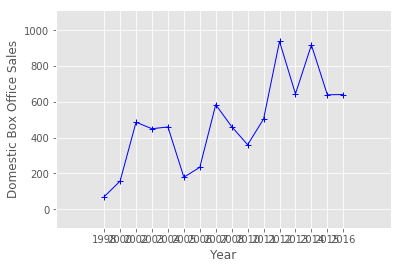

In [7]:
# Bar chart
marvel_xaxis
DC_axis
years=[]
plt.bar(x_axis, users, color='r', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(users)+5000)
plt.title("Marvel v DC: Box Office Sales past 20 years")
plt.xlabel("Year")
plt.ylabel("US Domestic ")
plt.show()


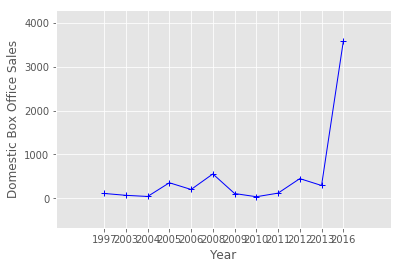